In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('drug.txt',sep=',',skiprows = 9, header= None)
data = data.dropna()
data.set_value(0,0,1)
data


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0\
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0\
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0\
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0\
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0\
5,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0\
6,7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0\
7,8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0\
8,9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0\
9,10,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0\


In [7]:
#Renommer les colonnes
data.columns = ['Id', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']
data.sort_values(by='Age')
data2 = data.copy()
data2.loc[data['Age']<-0.95197,'Age']='18-24 ans'
data2.loc[data['Age']==-0.07854,'Age']='25-34 ans'
data2.loc[data['Age']== 0.49788000000000004,'Age']='35-44 ans'
data2.loc[data['Age']==1.09449,'Age']='45-54 ans'
data2.loc[data['Age']==1.82213,'Age']='55-64 ans'
data2.loc[data['Age']==2.59171,'Age']='65+ ans'
print(len(data.loc[data['Age'] == 1.82213])) #93 personnes de 55-64 ans 
print(len(data.loc[data['Age'] == -0.07854])) #481 personnes de 25-34 ans
data2.head()

93
481


,Id,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44 ans,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0\
1,2,25-34 ans,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0\
2,3,35-44 ans,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0\
3,4,18-24 ans,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0\
4,5,35-44 ans,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0\


In [6]:
data2.Age[2]

0.49788000000000004

In [8]:
Descr=[data.mean(),data.median(),data.std()]
print(len(data[(data['Age']<-0.95197)&(data['Cannabis']=='CL0')])) #Nombre de jeunes qui n'ont jamais fumé de cannabis
print(len(data[(data['Age']<-0.95197)&(data['Nicotine']=='CL0')])) #Nombre de jeunes qui n'ont jamais fumé de cigarettes
print(len(data[(data['Age']<-0.95197)&(data['Alcohol']=='CL0')])) #Nombre de jeunes qui n'ont jamais bu
print(len(data[(data['Age']<-0.95197)&(data['Heroin']=='CL0')])) #Nombre de jeunes qui n'ont jamais pris d'Heroine
print(len(data[(data['Age']<-0.95197)])) #Nombre de jeunes qui n'ont jamais pris d'Heroine


58
107
14
544
643


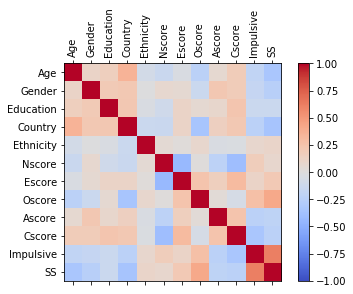

In [4]:
corr = data[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']].columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']].columns)
ax.set_yticklabels(data[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']].columns)
plt.show()

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


Text(0.5,1,'Variance expliquée')

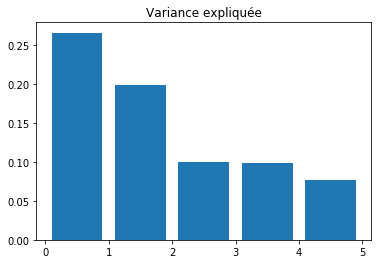

In [143]:
#ACP python
pca = PCA(n_components=5)
print(pca.fit(data[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore','Impulsive', 'SS']]))
pca.explained_variance_ratio_
plt.bar(np.arange(len(pca.explained_variance_ratio_))+0.5, pca.explained_variance_ratio_)
plt.title("Variance expliquée")

Text(0.5,1,'ACP rapprochant les profils des individus similaires')

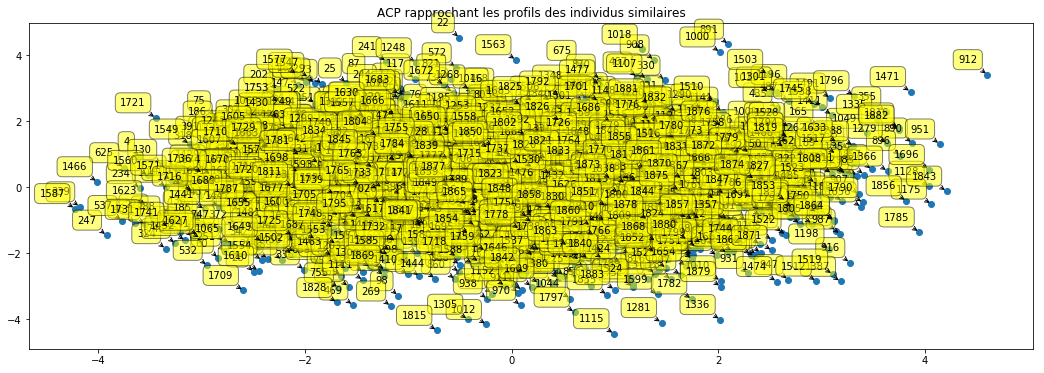

In [120]:
data_reduced = pca.transform(data[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore','Impulsive', 'SS']])
plt.figure(figsize=(18,6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1])

for label, x, y in zip(data.index, data_reduced[:, 0], data_reduced[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-10, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.title("ACP rapprochant les profils des individus similaires")

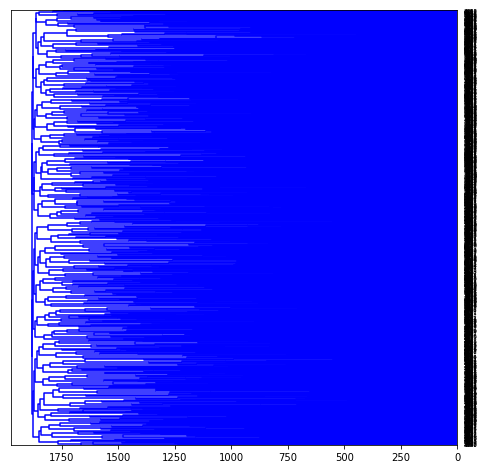

In [121]:
ward = AgglomerativeClustering(linkage='ward', compute_full_tree='auto').fit(data[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore','Impulsive', 'SS']])
dendro = [ ]
for a,b in ward.children_:
    dendro.append([a,b,float(len(dendro)+1),len(dendro)+1])

from scipy.cluster.hierarchy import dendrogram
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
r = dendrogram(dendro, color_threshold=1, labels=data[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore','Impulsive', 'SS']].index, show_leaf_counts=True, ax=ax, orientation = "left")

In [5]:
#1 er modèle : Prédiction naïve consommation canabis
id_col = ['Id']
other_than_alcohol_and_cannabis_drug_cols = ['Amphet', 'Amyl', 'Benzos', 'Caff', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']
to_be_dropped_cols = id_col + other_than_alcohol_and_cannabis_drug_cols
data=data.drop(to_be_dropped_cols, axis=1)

In [6]:
Y=[]
for i in range (len(data.Cannabis)) :
    if (data.Cannabis[i] in ['CLO', 'CL1', 'CL2', 'CL3']) :
        Y.append("Non_user")
    else :
        Y.append("User")
data=data.drop(['Cannabis'], axis=1)
data['isUser']=Y

In [22]:
#split label and features
X = data.drop(['isUser'], axis=1)
y = data.isUser

In [32]:
#Encodage one-hot pour les variables catégorielles
X=pd.get_dummies(X)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol_CL0,Alcohol_CL1,Alcohol_CL2,Alcohol_CL3,Alcohol_CL4,Alcohol_CL5,Alcohol_CL6
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0,0,0,0,0,1,0
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,0,0,0,0,1
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,0,0,1,0,0
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,0,0,1,0,0
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0,0,1,0,0,0,0


In [9]:
#Create pipeline
my_pipeline = make_pipeline(Imputer(), RandomForestClassifier())

In [34]:
#fit the pipeline with data
my_pipeline.fit(X,y)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decr...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [11]:
#Make predictions
predictions = my_pipeline.predict(X)

In [12]:
#Get the accuracy
print(cross_val_score(my_pipeline, X, y, scoring ='accuracy'))

[0.53980892 0.66401274 0.61146497]


In [73]:
from sklearn.tree import DecisionTreeRegressor
my_pipe = make_pipeline(Imputer(), DecisionTreeRegressor(max_depth=5))
y2=pd.get_dummies(y)

my_pipe.fit(X,y2)
predictions2 = my_pipe.predict(X)
print(cross_val_score(my_pipe, X, y2, scoring ='accuracy'))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets